#Coding and Noncoding

**What can we learn with wavelets about DNA sequences**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt


In [2]:
# Read the content of the file
file_path = "C:/Users/Miranda Córdova/Documents/cimat/Tercer semestre/DeepLearning/Proyectos/coding and not codding/DSP_datasets/ncbi_dataset/data/gene.fna"
#file_path = "/content/drive/MyDrive/Tercer semestre/Proyecto DeepLearning/Homo_sapiens_ENST00000379802_8_sequence.fa"

with open(file_path, "r") as file:
    file_content = file.read()

# Split the content into sequences and labels
sequences_and_labels = [entry.split("\n", 1) for entry in file_content.split(">")[1:]]


# Extract the labels and sequences
labels = [entry[0] for entry in sequences_and_labels]
sequences = [entry[1].replace("\n", "") for entry in sequences_and_labels]

# Count the number of letters in each sequence
letter_counts = [len(sequence) for sequence in sequences]

# Create a DataFrame
df = pd.DataFrame({
    'Label': labels,
    'Sequence': sequences,
    'Letter_Count': letter_counts
})

# Print the DataFrame
print(df)


                                               Label  \
0  NC_000006.12:7541671-7586714 DSP [organism=Hom...   
1  NC_060930.1:7410711-7455759 DSP [organism=Homo...   

                                            Sequence  Letter_Count  
0  CCTCTGCGCCCTTGCCGCCCTCCGAGCCACAGCTTTCCTCCCGCTC...         45044  
1  CCTCTGCGCCCTTGCCGCCCTCCGAGCCACAGCTTTCCTCCCGCTC...         45049  


In [3]:
df.head()

,Label,Sequence,Letter_Count
0,NC_000006.12:7541671-7586714 DSP [organism=Hom...,CCTCTGCGCCCTTGCCGCCCTCCGAGCCACAGCTTTCCTCCCGCTC...,45044
1,NC_060930.1:7410711-7455759 DSP [organism=Homo...,CCTCTGCGCCCTTGCCGCCCTCCGAGCCACAGCTTTCCTCCCGCTC...,45049


In [8]:
df['Label']

0    NC_000006.12:7541671-7586714 DSP [organism=Hom...
1    NC_060930.1:7410711-7455759 DSP [organism=Homo...
Name: Label, dtype: object

In [4]:
#DNA walk purins and pirimidins 
def GC_encode(short_read_line):
    mapping = {'G': 1, 'A': 1, 'T': -1, 'C': -1, 'N': 0}
    return [mapping.get(base, 0) for base in short_read_line]

# Apply GC_encode to the 'Sequence' column
df['GC_Encoded'] = df['Sequence'].apply(GC_encode)

# Print the updated DataFrame
print(df[['Label', 'GC_Encoded']])



                                               Label  \
0  NC_000006.12:7541671-7586714 DSP [organism=Hom...   
1  NC_060930.1:7410711-7455759 DSP [organism=Homo...   

                                          GC_Encoded  
0  [-1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1,...  
1  [-1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1,...  


In [5]:

# Function to calculate GC ratio 
def calculate_gc_ratio(sequence):
    nG = sequence.count('G')
    nC = sequence.count('C')
    nA = sequence.count('A')
    nT = sequence.count('T')

    # Avoid division by zero
    if nA + nG + nC + nT == 0:
        return 0

    gc_ratio = (nG + nC) / (nA + nG + nC + nT)
    return gc_ratio

# Apply the function to create a new 'GC_ratio' column
df['GC_ratio'] = df['Sequence'].apply(calculate_gc_ratio)


In [6]:
df.head()

,Label,Sequence,Letter_Count,GC_Encoded,GC_ratio
0,NC_000006.12:7541671-7586714 DSP [organism=Hom...,CCTCTGCGCCCTTGCCGCCCTCCGAGCCACAGCTTTCCTCCCGCTC...,45044,"[-1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1,...",0.422698
1,NC_060930.1:7410711-7455759 DSP [organism=Homo...,CCTCTGCGCCCTTGCCGCCCTCCGAGCCACAGCTTTCCTCCCGCTC...,45049,"[-1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1,...",0.422740


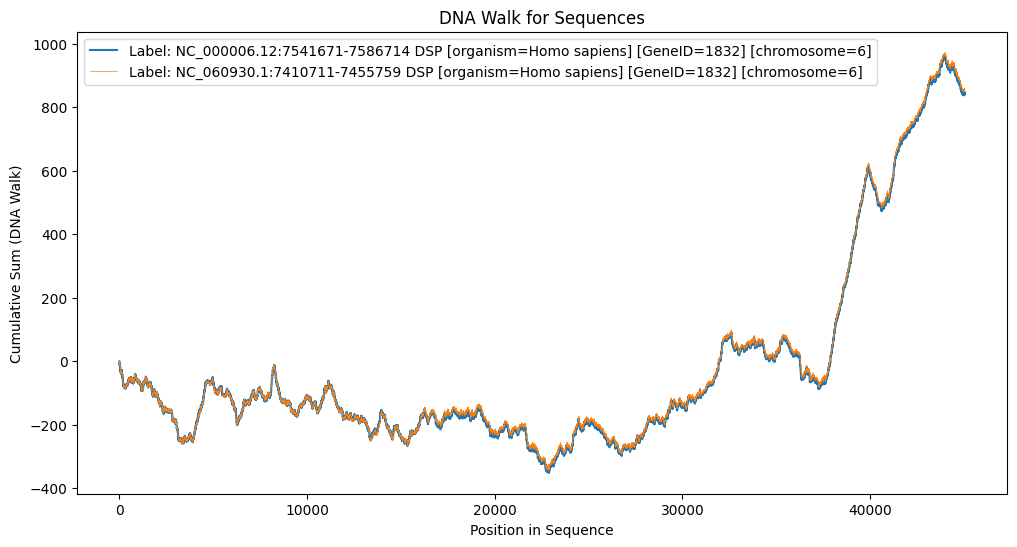

In [35]:

# Plotting the DNA walks for both sequences on the same plot
plt.figure(figsize=(12, 6))

# Plotting the DNA walk for the first sequence
sequence1 = df.loc[0, 'GC_Encoded']
sequence_numeric1 = np.array(sequence1, dtype=int)
dna_walk1 = np.cumsum(sequence_numeric1)
plt.plot(dna_walk1, label=f'Label: {df.loc[0, "Label"]}')

# Plotting the DNA walk for the second sequence
sequence2 = df.loc[1, 'GC_Encoded']
sequence_numeric2 = np.array(sequence2, dtype=int)
dna_walk2 = np.cumsum(sequence_numeric2)
plt.plot(dna_walk2, label=f'Label: {df.loc[1, "Label"]}',linewidth=0.5)

plt.title('DNA Walk for Sequences')
plt.xlabel('Position in Sequence')
plt.ylabel('Cumulative Sum (DNA Walk)')
plt.legend()
plt.show()


Ambas secuencias son muy similares, ambas codifican al mismo gen y se encuentran en el mismo cromosoma

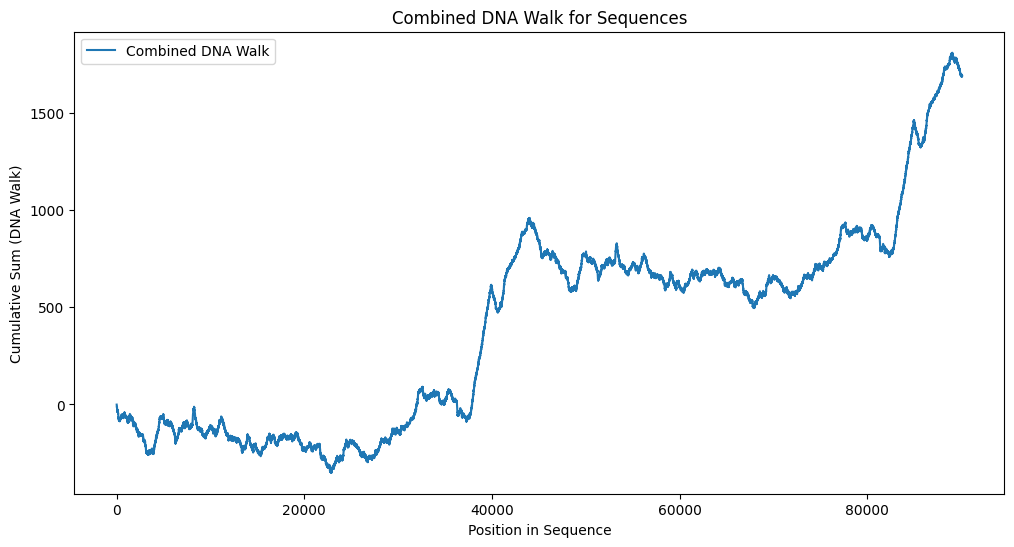

In [42]:
i

# Concatenating both sequences
concatenated_sequence = np.concatenate([df.loc[0, 'GC_Encoded'], df.loc[1, 'GC_Encoded']])
concatenated_numeric = np.array(concatenated_sequence, dtype=int)
cumulative_sum = np.cumsum(concatenated_numeric)

# Plotting the combined DNA walk
plt.figure(figsize=(12, 6))
plt.plot(cumulative_sum, label=f'Combined DNA Walk')

plt.title('Combined DNA Walk for Sequences')
plt.xlabel('Position in Sequence')
plt.ylabel('Cumulative Sum (DNA Walk)')
plt.legend()
plt.show()


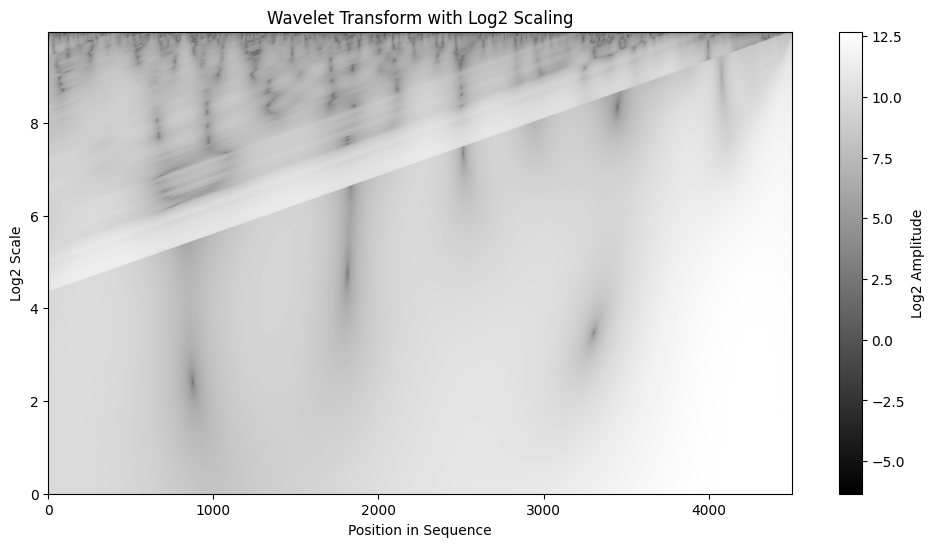

In [46]:

# Down-sample the data to reduce memory usage
downsample_factor = 10
downsampled_dna_walk1 = dna_walk1[::downsample_factor]

# Compute the Continuous Wavelet Transform (CWT) with the analyzing wavelet 
wavelet = 'cmor'  # Morlet wavelet,
max_scale = 1000 
scales = np.arange(1, min(max_scale, len(downsampled_dna_walk1)) + 1)
coefficients, frequencies = pywt.cwt(downsampled_dna_walk1, scales, wavelet)

# Apply log2 scaling to both axes
log2_scales = np.log2(scales)
log2_coefficients = np.log2(np.abs(coefficients))

# Plotting the WT with log2 scaling
plt.figure(figsize=(12, 6))
plt.imshow(log2_coefficients, aspect='auto', cmap='gray', extent=[0, len(downsampled_dna_walk1), min(log2_scales), max(log2_scales)])
plt.title('Wavelet Transform with Log2 Scaling NC_0000006)
plt.xlabel('Position in Sequence')
plt.ylabel('Log2 Scale')
plt.colorbar(label='Log2 Amplitude')
plt.show()



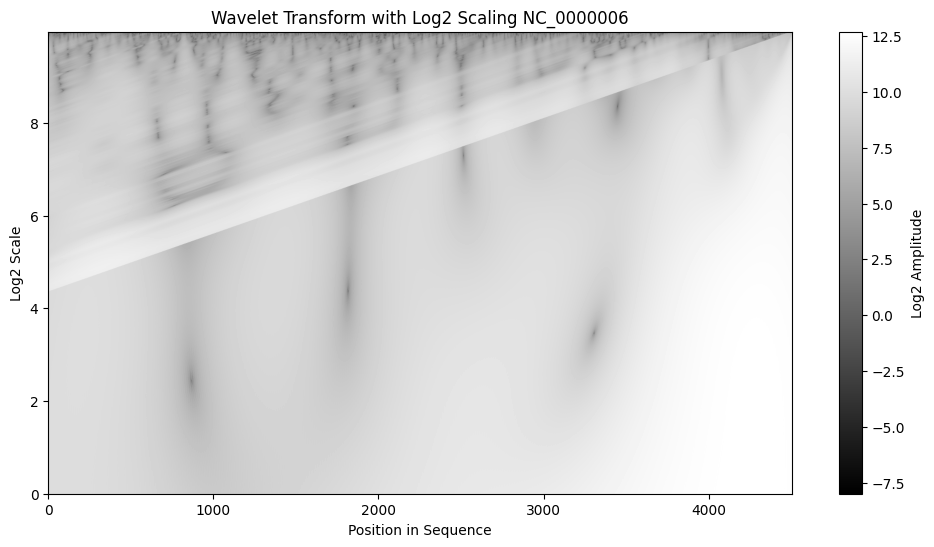

In [82]:

# Down-sample the data to reduce memory usage
downsample_factor = 10
downsampled_dna_walk2 = dna_walk2[::downsample_factor]

# Compute the Continuous Wavelet Transform (CWT) with the analyzing wavelet 
wavelet = 'cmor'  # Morlet wavelet,
max_scale = 1000 
scales = np.arange(1, min(max_scale, len(downsampled_dna_walk1)) + 1)
coefficients, frequencies = pywt.cwt(downsampled_dna_walk2, scales, wavelet)

# Apply log2 scaling to both axes
log2_scales = np.log2(scales)
log2_coefficients = np.log2(np.abs(coefficients))

# Plotting the WT with log2 scaling
plt.figure(figsize=(12, 6))
plt.imshow(log2_coefficients, aspect='auto', cmap='gray', extent=[0, len(downsampled_dna_walk2), min(log2_scales), max(log2_scales)])
plt.title('Wavelet Transform with Log2 Scaling NC_0000006')
plt.xlabel('Position in Sequence')
plt.ylabel('Log2 Scale')
plt.colorbar(label='Log2 Amplitude')
plt.show()



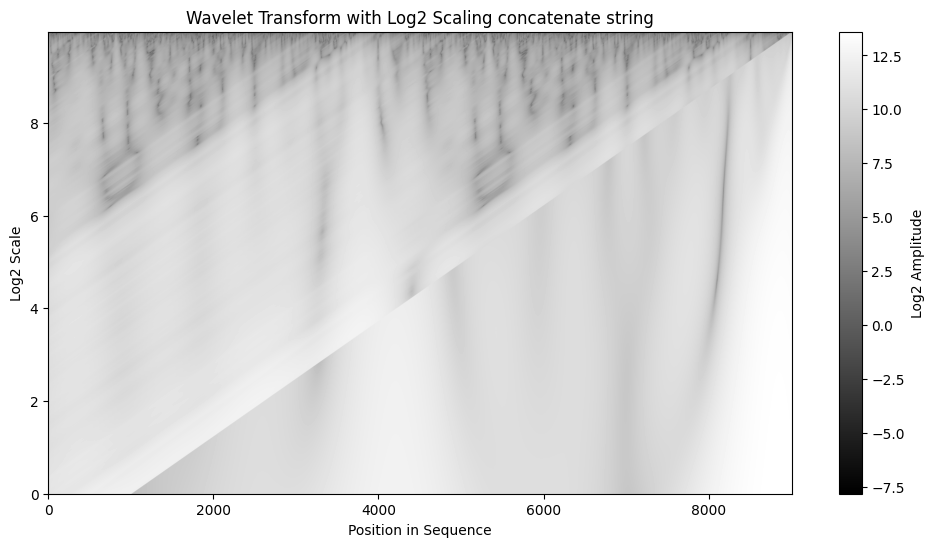

In [83]:

# Concatenating both sequences
concatenated_sequence = np.concatenate([df.loc[0, 'GC_Encoded'], df.loc[1, 'GC_Encoded']])
concatenated_numeric = np.array(concatenated_sequence, dtype=int)
cumulative_sum = np.cumsum(concatenated_numeric)

# Down-sample the data to reduce memory usage
downsample_factor = 10
downsampled_cumulative_sum = cumulative_sum[::downsample_factor]

# Compute the Continuous Wavelet Transform (CWT) with the analyzing wavelet 
wavelet = 'cmor'  # Morlet wavelet
max_scale = 1000  # Limit the maximum number of scales
scales = np.arange(1, min(max_scale, len(downsampled_cumulative_sum)) + 1)
coefficients, frequencies = pywt.cwt(downsampled_cumulative_sum, scales, wavelet)

# Apply log2 scaling to both axes
log2_scales = np.log2(scales)
log2_coefficients = np.log2(np.abs(coefficients))

# Plotting the WT with log2 scaling
plt.figure(figsize=(12, 6))
plt.imshow(log2_coefficients, aspect='auto', cmap='gray', extent=[0, len(downsampled_cumulative_sum), min(log2_scales), max(log2_scales)])
plt.title('Wavelet Transform with Log2 Scaling concatenate string')
plt.xlabel('Position in Sequence')
plt.ylabel('Log2 Scale')
plt.colorbar(label='Log2 Amplitude')
plt.show()


Representaciones visuales de los wavelets con valores continuos

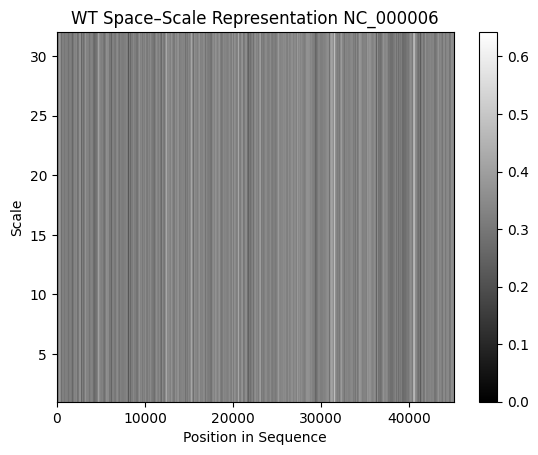

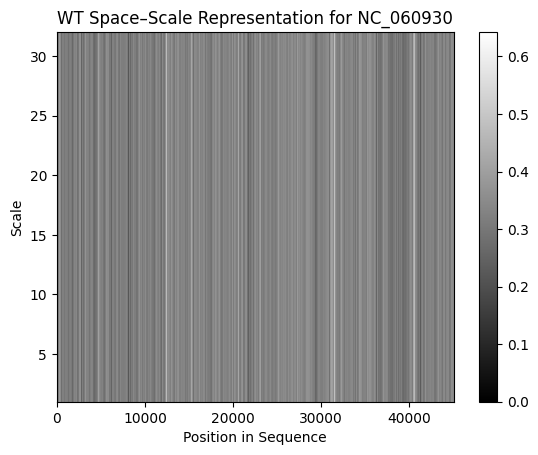

In [60]:
# Function to compute the wavelet transform at a specific scale
def compute_wavelet_transform(data, scale):
    wavelet = 'cmor'  # Morlet wavelet
    return pywt.cwt(data, [scale], wavelet)[0]

# Plotting the WT space–scale representation f
sequence1 = df.loc[0, 'GC_Encoded']
scales1 = np.arange(1, len(sequence1) + 1)
wavelet_transform1 = np.abs(compute_wavelet_transform(sequence1, 1))
plt.imshow(wavelet_transform1, aspect='auto', cmap='gray', extent=[0, len(sequence1), 1, 32])
plt.title('WT Space–Scale Representation NC_000006')
plt.xlabel('Position in Sequence')
plt.ylabel('Scale')
plt.colorbar()
plt.show()

# Plotting the WT space–scale representation 
sequence2 = df.loc[1, 'GC_Encoded']
scales2 = np.arange(1, len(sequence2) + 1)
wavelet_transform2 = np.abs(compute_wavelet_transform(sequence2, 1))
plt.imshow(wavelet_transform2, aspect='auto', cmap='gray', extent=[0, len(sequence2), 1, 32])
plt.title('WT Space–Scale Representation for NC_060930')
plt.xlabel('Position in Sequence')
plt.ylabel('Scale')
plt.colorbar()
plt.show()
#

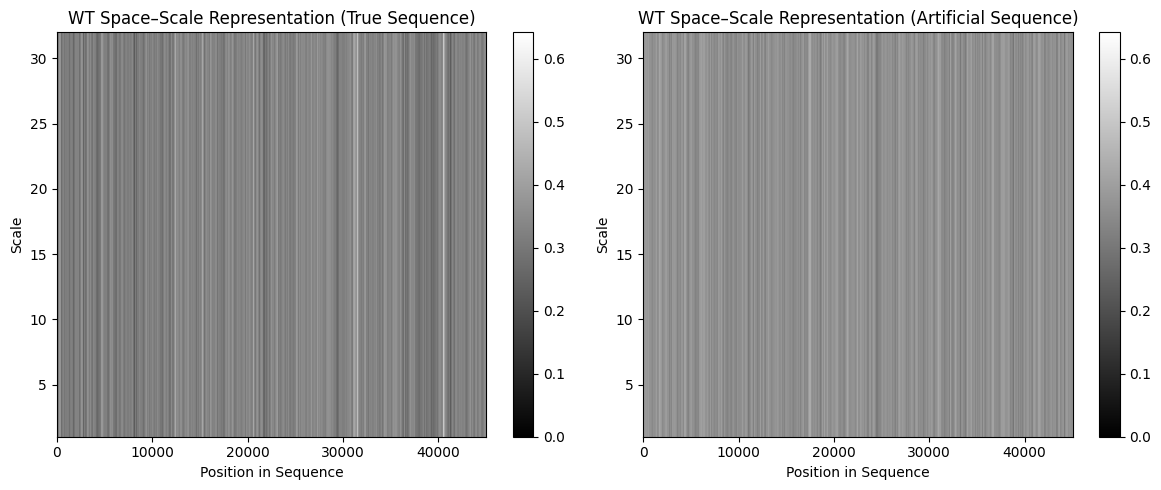

In [63]:

def generate_random_sequence(length):
    return np.random.choice([-1, 1], size=length)

def compute_wavelet_transform(data, scale):
    wavelet = 'cmor'  # Morlet wavelet
    return pywt.cwt(data, [scale], wavelet)[0]

def plot_wavelet_comparison(true_sequence, artificial_sequence, scale):
    # Compute wavelet transform for true sequence
    wavelet_transform_true = np.abs(compute_wavelet_transform(true_sequence, scale))

    # Compute wavelet transform for artificial sequence
    wavelet_transform_artificial = np.abs(compute_wavelet_transform(artificial_sequence, scale))

    # Plotting side by side for comparison
    plt.figure(figsize=(12, 5))

    # Plot for true sequence
    plt.subplot(1, 2, 1)
    plt.imshow(wavelet_transform_true, aspect='auto', cmap='gray', extent=[0, len(true_sequence), 1, 32])
    plt.title('WT Space–Scale Representation (True Sequence)')
    plt.xlabel('Position in Sequence')
    plt.ylabel('Scale')
    plt.colorbar()

    # Plot for artificial sequence
    plt.subplot(1, 2, 2)
    plt.imshow(wavelet_transform_artificial, aspect='auto', cmap='gray', extent=[0, len(artificial_sequence), 1, 32])
    plt.title('WT Space–Scale Representation (Artificial Sequence)')
    plt.xlabel('Position in Sequence')
    plt.ylabel('Scale')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

# Generate a random artificial sequence
artificial_sequence = generate_random_sequenc

plot_wavelet_comparison(sequence1, artificial_sequence, scale=1)


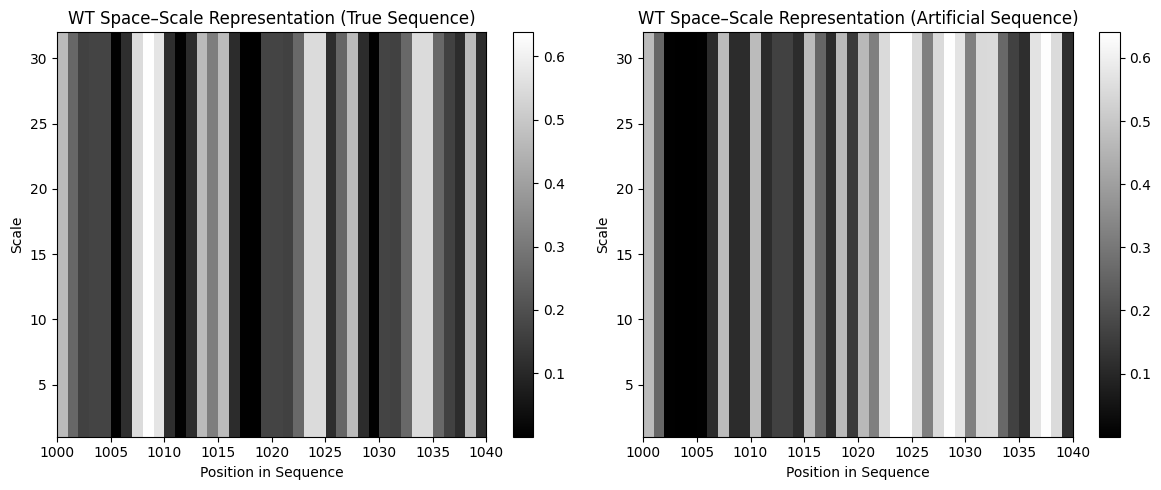

In [78]:

def generate_random_sequence(length):
    return np.random.choice([-1, 1], size=length)

def compute_wavelet_transform(data, scale):
    wavelet = 'cmor'  # Morlet wavelet
    return pywt.cwt(data, [scale], wavelet)[0]

def plot_wavelet_comparison(true_sequence, artificial_sequence, scale, zoom_range):
    # Compute wavelet transform for true sequence
    wavelet_transform_true = np.abs(compute_wavelet_transform(true_sequence, scale))

    # Compute wavelet transform for artificial sequence
    wavelet_transform_artificial = np.abs(compute_wavelet_transform(artificial_sequence, scale))

    # Get indices for zoom range
    start_index, end_index = zoom_range
    start_index = max(0, start_index)
    end_index = min(len(true_sequence), end_index)

    # Plotting side by side for comparison
    plt.figure(figsize=(12, 5))

    # Plot for true sequence
    plt.subplot(1, 2, 1)
    plt.imshow(wavelet_transform_true[:, start_index:end_index], aspect='auto', cmap='gray',
               extent=[start_index, end_index, 1, 32])
    plt.title('WT Space–Scale Representation (True Sequence)')
    plt.xlabel('Position in Sequence')
    plt.ylabel('Scale')
    plt.colorbar()

    # Plot for artificial sequence
    plt.subplot(1, 2, 2)
    plt.imshow(wavelet_transform_artificial[:, start_index:end_index], aspect='auto', cmap='gray',
               extent=[start_index, end_index, 1, 32])
    plt.title('WT Space–Scale Representation (Artificial Sequence)')
    plt.xlabel('Position in Sequence')
    plt.ylabel('Scale')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

# Generate a random artificial sequence
artificial_sequence = generate_random_sequence(45044)


zoom_range = (1000, 1040)  
plot_wavelet_comparison(sequence1, artificial_sequence, scale=1, zoom_range=zoom_range)


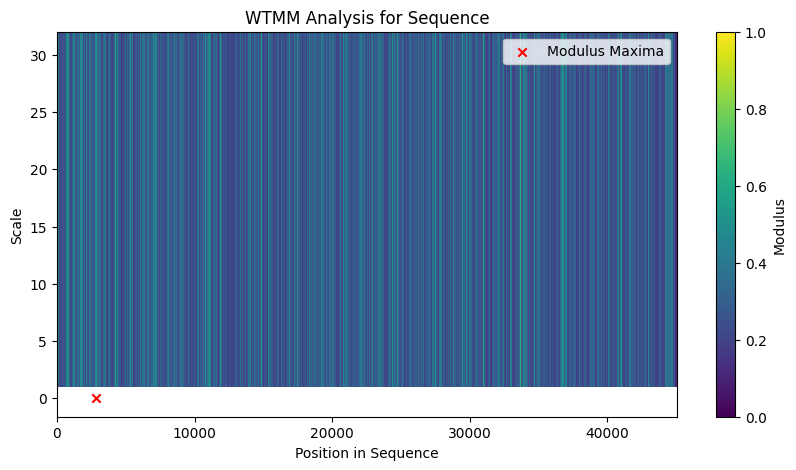

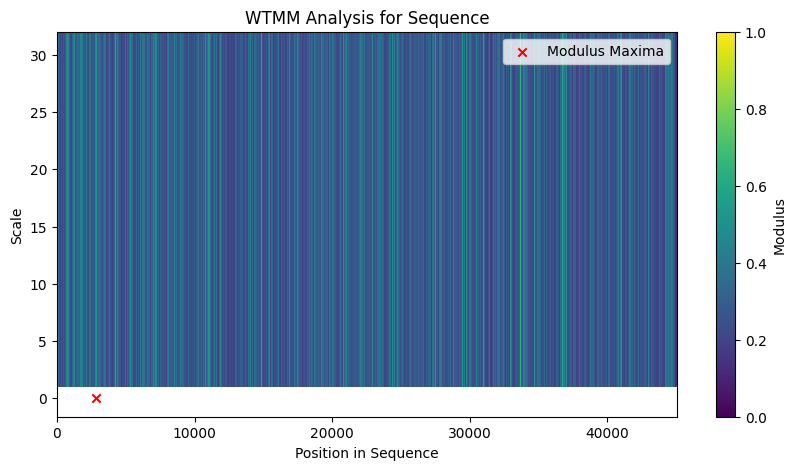

In [97]:

# Function to compute the wavelet transform at a specific scale
def compute_wavelet_transform(data, scale):
    wavelet = 'cmor'  # Morlet wavelet
    return pywt.cwt(data, [scale], wavelet)[0]

# Function to find modulus maxima in the wavelet transform
def find_modulus_maxima(wavelet_transform):
    # 
    maxima = np.where(wavelet_transform == np.max(wavelet_transform))
    return maxima

# Function to plot the WTMM analysis
def plot_wtmm_analysis(sequence, scale):
    wavelet_transform = np.abs(compute_wavelet_transform(sequence, scale))
    maxima = find_modulus_maxima(wavelet_transform)

    plt.figure(figsize=(10, 5))
    plt.imshow(wavelet_transform, aspect='auto', cmap='viridis', extent=[0, len(sequence), 1, scale])
    plt.scatter(maxima[1], maxima[0], c='red', marker='x', label='Modulus Maxima')
    plt.title(f'WTMM Analysis for Sequence')
    plt.xlabel('Position in Sequence')
    plt.ylabel('Scale')
    plt.colorbar(label='Modulus')
    plt.legend()
    plt.show()

# Applying WTMM analysis for sequences in df with 'GC_Encoded' column
for index, row in df.iterrows():
    gc_encoded_sequence = row['GC_Encoded']
    scale = 32  # Choose an appropriate scale
    plot_wtmm_analysis(gc_encoded_sequence, scale)
    
# https://github.com/igor-93/wtmm/blob/master/example.ipynb

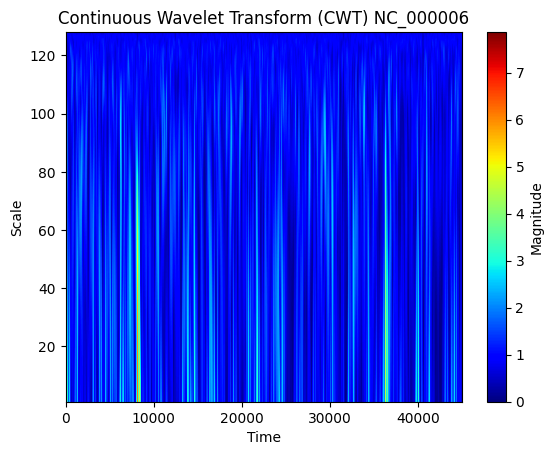

In [87]:
#Weighill, D., Macaya-Sanz, D., DiFazio, S. P., Joubert, W., Shah, M., Schmutz, J., ... & Jacobson, D. (2019). Wavelet-based genomic signal processing for centromere identification and hypothesis generation. Frontiers in genetics, 10, 487.

from scipy.signal import cwt, ricker

sequence = df.loc[0, 'GC_Encoded']
wavelet_widths = np.arange(1, 128)
wavelet = ricker

# Compute the Continuous Wavelet Transform (CWT)
cwt_matrix = cwt(sequence, wavelet, wavelet_widths)

# Plot the scaleogram
plt.imshow(np.abs(cwt_matrix), aspect='auto', extent=[0, len(sequence), 1, 128], cmap='jet', interpolation='bilinear')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT) NC_000006')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()


In [100]:
stack =np.vstack(cwt_matrix)
stack

array([[-6.64298431e-06, -5.75403270e-01, -2.64779862e-01, ...,
         7.25961232e-01, -1.62998750e+00,  1.73922281e-01],
       [-1.97659738e-01, -1.01338927e+00, -1.49041819e+00, ...,
         1.20456571e-01,  3.33174538e-02,  2.38532599e-01],
       [-6.72278074e-01, -1.24320518e+00, -1.44419413e+00, ...,
        -4.56167011e-01,  9.57304359e-02,  4.84485470e-01],
       ...,
       [-1.14980015e+00, -1.18042731e+00, -1.21105332e+00, ...,
         8.96574264e-01,  8.98005116e-01,  8.99294611e-01],
       [-1.17326754e+00, -1.20403617e+00, -1.23481787e+00, ...,
         8.98329422e-01,  8.99919143e-01,  9.01381860e-01],
       [-1.19706587e+00, -1.22798058e+00, -1.25889470e+00, ...,
         8.99876906e-01,  9.01649508e-01,  9.03281400e-01]])

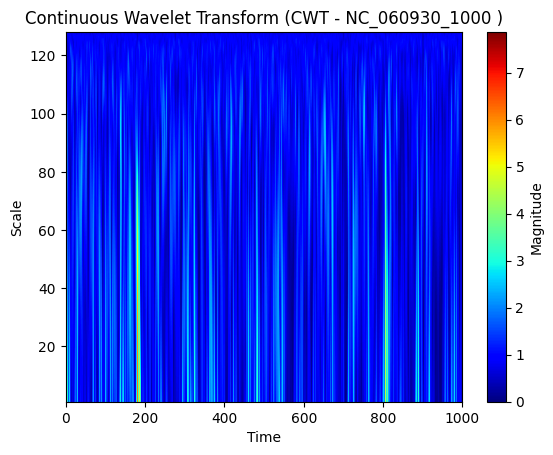

In [23]:
from scipy.signal import cwt, ricker

sequence =df.loc[0, 'GC_Encoded']

wavelet_widths = np.arange(1, 128)
wavelet = ricker

# Compute the Continuous Wavelet Transform (CWT)
cwt_matrix = cwt(sequence, wavelet, wavelet_widths)

# Plot the scaleogram
plt.imshow(np.abs(cwt_matrix), aspect='auto', extent=[0, 1000, 1, 128], cmap='jet', interpolation='bilinear')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT - NC_060930_1000 )')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()
#https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

Continuous Wavelet Transform (CWT):

The CWT is a mathematical tool that decomposes a signal into its components at different scales. It uses a wavelet function to analyze the signal in both time and frequency domains simultaneously.
CWT is suitable for analyzing signals with non-stationary characteristics.
Modulus Maxima:

The modulus of the wavelet transform represents the amplitude of the transformed signal at each point.
Modulus maxima are points in the transformed signal where the amplitude is locally maximal. These points are crucial for identifying significant features in the signal.

WTMM Analysis Steps:

Wavelet Transform: Apply the CWT to the signal using a selected wavelet basis function.
Modulus Calculation: Compute the modulus of the resulting wavelet coefficients.
Local Maxima Identification: Locate points where the modulus reaches a local maximum. These points correspond to areas of interest in the signal with high energy or significant variations.

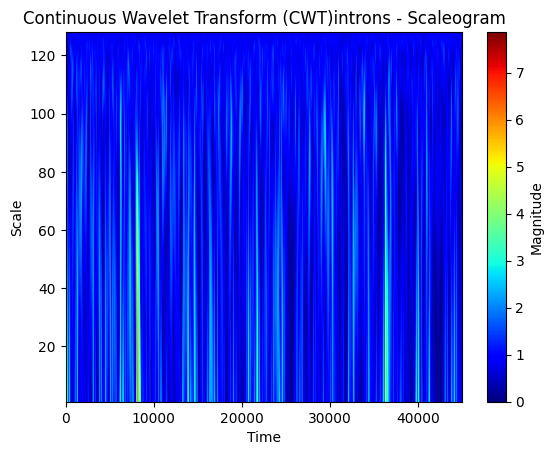

In [102]:
from scipy.signal import cwt, ricker
sequence=df.loc[1, 'GC_Encoded']
# Choose an appropriate wavelet (e.g., Ricker wavelet)
wavelet_widths = np.arange(1, 128)
wavelet = ricker

# Compute the Continuous Wavelet Transform (CWT)
cwt_matrix = cwt(sequence, wavelet, wavelet_widths)

# Plot the scaleogram
plt.imshow(np.abs(cwt_matrix), aspect='auto', extent=[0, len(sequence), 1, 128], cmap='jet', interpolation='bilinear')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT)introns - Scaleogram')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()